In [55]:
%matplotlib inline
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score


In [56]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,sepal-length,sepal-width,petal-length,petal-width,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
# Shape of data
df.shape

(150, 6)

In [58]:
# for finding out null entries as well as for checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   sepal-length  150 non-null    float64
 2   sepal-width   150 non-null    float64
 3   petal-length  150 non-null    float64
 4   petal-width   150 non-null    float64
 5   class         150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [59]:
#summary
df.describe()

,Id,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [60]:
#summary of target variable
df.describe(include=['object'])

,class
count,150
unique,3
top,Iris-versicolor
freq,50


In [61]:
# categories in tareget vaiables
df['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [62]:
df.drop(['Id'], axis = 1)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [63]:
# Skewness
df.skew()

Id              0.000000
sepal-length    0.314911
sepal-width     0.334053
petal-length   -0.274464
petal-width    -0.104997
dtype: float64

In [64]:
# Co-relation
df.corr()

,Id,sepal-length,sepal-width,petal-length,petal-width
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
sepal-length,0.716676,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.882747,0.871754,-0.420516,1.000000,0.962757
petal-width,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

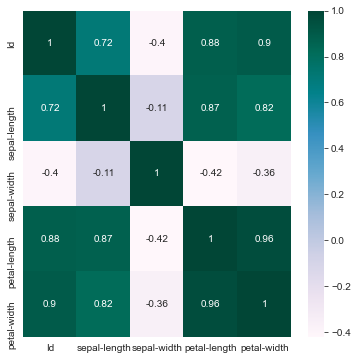

In [65]:
#heatmap
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap="PuBuGn")

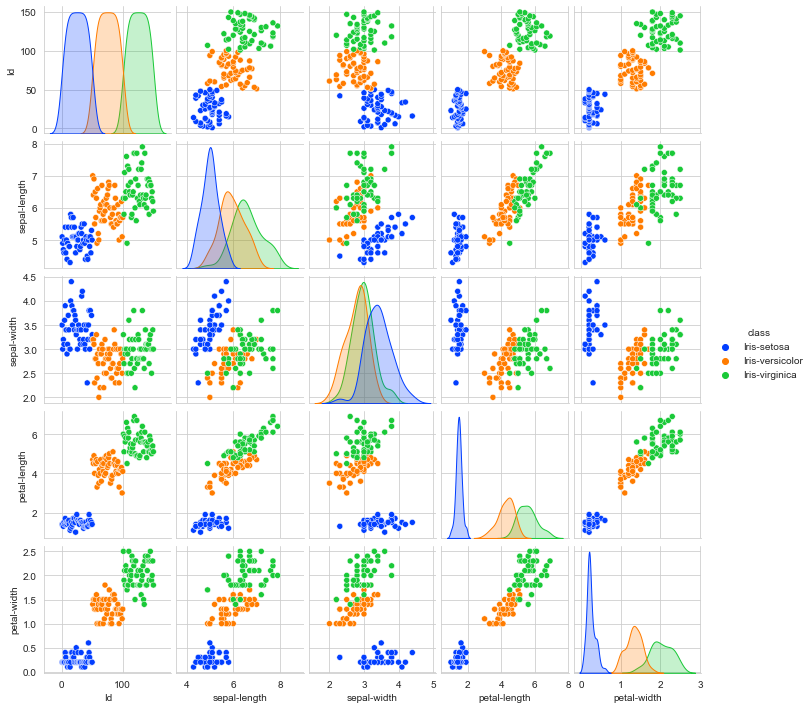

In [66]:
sns.pairplot(df,hue="class",palette="bright",diag_kind="auto",size=2)

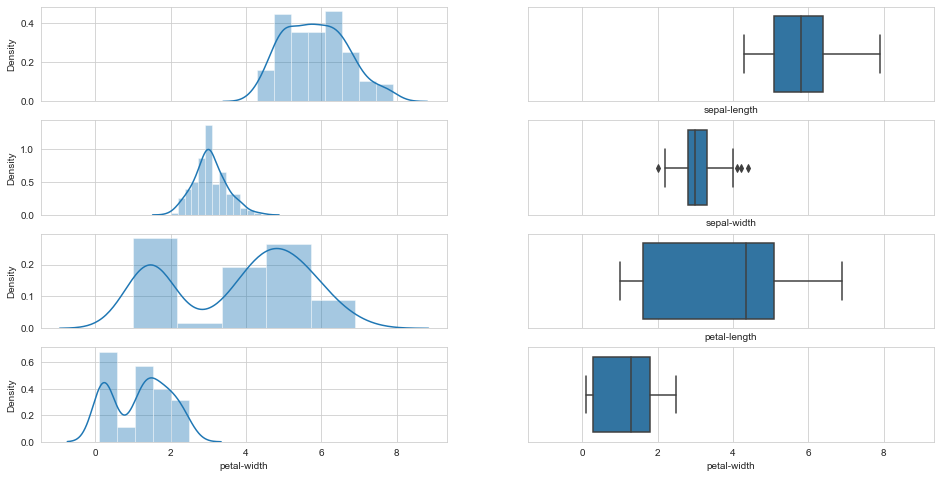

In [67]:
# distplot(sns)
_, ax = plt.subplots(4, 2, sharex=True, figsize=(16, 8))
sns.distplot(df['sepal-length'],ax=ax[0][0])
sns.boxplot(df['sepal-length'],ax=ax[0][1])
sns.distplot(df['sepal-width'],ax=ax[1][0])
sns.boxplot(df['sepal-width'],ax=ax[1][1])
sns.distplot(df['petal-length'],ax=ax[2][0])
sns.boxplot(df['petal-length'],ax=ax[2][1])
sns.distplot(df['petal-width'],ax=ax[3][0])
sns.boxplot(df['petal-width'],ax=ax[3][1])
plt.show()

In [54]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='class', ylabel='petal-width'>

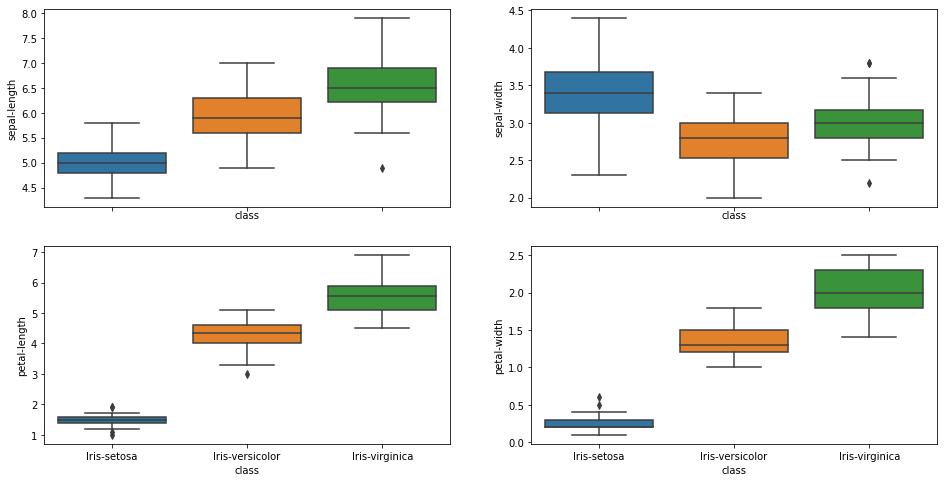

In [35]:
# Boxplot
_, ax = plt.subplots(2, 2, sharex=True, figsize=(16, 8))
sns.boxplot(x='class', y='sepal-length', data=df, ax=ax[0,0])
sns.boxplot(x='class', y='sepal-width', data=df, ax=ax[0,1])
sns.boxplot(x='class', y='petal-length', data=df, ax=ax[1,0])
sns.boxplot(x='class', y='petal-width', data=df, ax=ax[1,1])

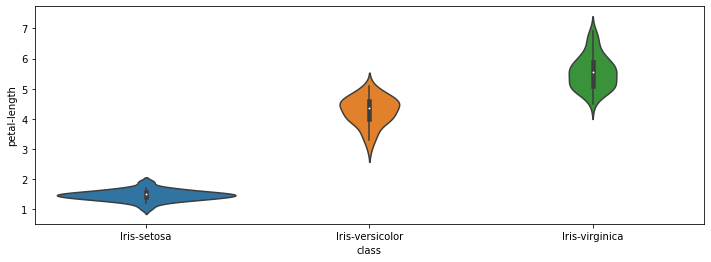

In [36]:
# violin plot
plt.figure(figsize=(12,4))
sns.violinplot(x="class",y="petal-length",data=df)
plt.show()

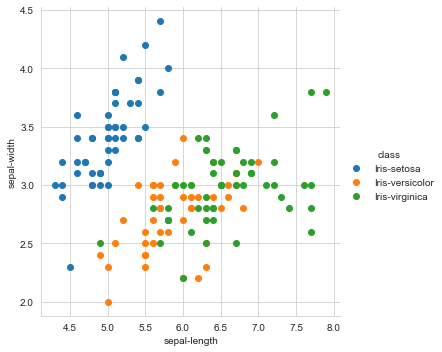

In [37]:
# scatter plot
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="class", size=5) \
   .map(plt.scatter, "sepal-length","sepal-width") \
   .add_legend();
plt.show();

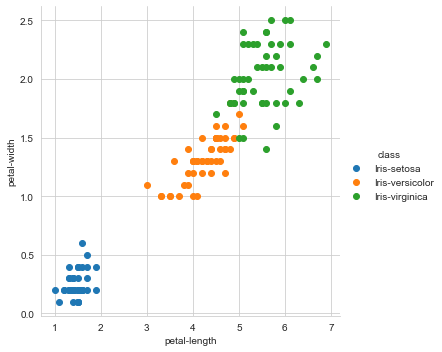

In [38]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="class", size=5) \
   .map(plt.scatter, "petal-length","petal-width") \
   .add_legend();
plt.show();

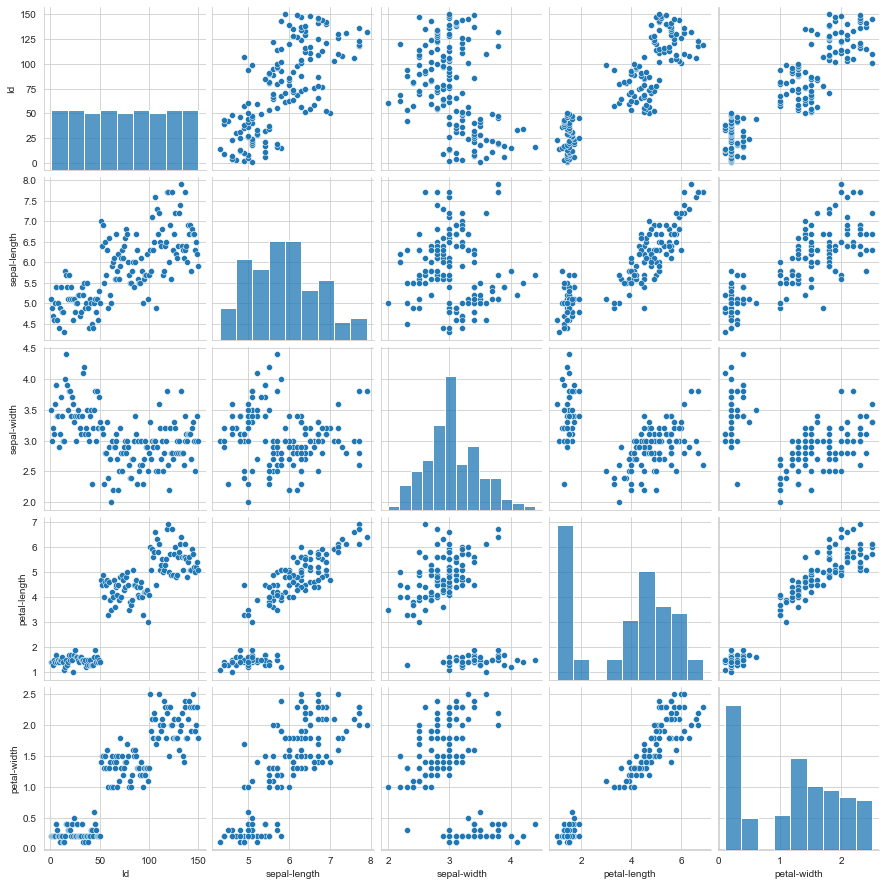

In [39]:
#pairplot
sns.pairplot(df)

In [40]:
X = df.drop('class',axis=1)
y = df['class']

In [41]:
X.shape,y.shape

((150, 5), (150,))

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [43]:
X_train.shape, y_train.shape

((112, 5), (112,))

In [44]:
X_test.shape, y_test.shape

((38, 5), (38,))

In [45]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score
ds_tree=DecisionTreeClassifier(criterion = "entropy")
ds_tree.fit(X_train,y_train)
pred=ds_tree.predict(X_test)

In [46]:
print('accuracy_score: ',accuracy_score(y_test,pred))
print('confusion_matrix:\n',confusion_matrix(y_test,pred))

accuracy_score:  0.9736842105263158
confusion_matrix:
 [[13  0  0]
 [ 0 16  0]
 [ 0  1  8]]


In [47]:
#Comparison of actual v/s predicted output
X_test['Expected_outcome']=y_test
X_test['Predicted_outcome']=pred
X_test

,Id,sepal-length,sepal-width,petal-length,petal-width,Expected_outcome,Predicted_outcome
114,115,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica
62,63,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-versicolor
33,34,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa
107,108,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
7,8,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
100,101,6.3,3.3,6.0,2.5,Iris-virginica,Iris-versicolor
40,41,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa
86,87,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor
76,77,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor
71,72,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor


In [48]:
#Model Evaluation
from sklearn.metrics import classification_report
print("Accuracy of the model is", accuracy_score(pred, y_test))
print('Classification Report\n')
print(classification_report(y_test,pred))

Accuracy of the model is 0.9736842105263158
Classification Report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        38
      macro avg       0.98      0.96      0.97        38
   weighted avg       0.98      0.97      0.97        38

